In [30]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})


In [31]:
n_res = 100000
f = np.sin
x = np.linspace(-1, 1, n_res)
y = f(np.pi*x)

In [32]:
# D
num_model = 100

In [33]:
# n
num_sample = np.array([2, 5])
num_sample = np.append(num_sample, np.arange(10, 210, 10))

In [34]:
# Store bias and var when number of sample 
# for training model is increasing

# Bias และ Variance เมื่อ จำนวน sample ที่ใช้ train model เปลี่ยนไป

In [35]:
g_bar = []
bias = []
variance = []
in_sample_err = []
out_sample_err = []

for ns in num_sample:
    # gd
    const_weights = np.array([])
    e_ins = []
    e_outs = []
    for i in range(num_model):
        x_sample = np.random.choice(x, ns)
        y_sample = f(np.pi*x_sample)
        const_w = np.mean(y_sample)
        const_weights = np.append(const_weights, const_w)
        e_in = bv.cal_e_in(const_w, y_sample)
        e_ins.append(e_in)
        e_out = bv.cal_e_out(const_w, y)
        e_outs.append(e_out)
    const_gavg = bv.cal_gavg(const_weights)
    g_bar.append(const_gavg)
    const_bias = bv.cal_bias(const_gavg, y)
    const_var = bv.cal_variance(const_weights, const_gavg)
    bias.append(const_bias)
    variance.append(const_var)
    in_sample_err.append(np.mean(e_ins))
    out_sample_err.append(np.mean(e_outs))

## Learning Curve of Constant Model sin(pi x) x = [-1, 1]

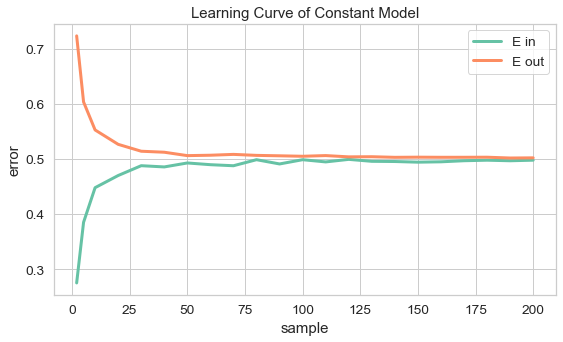

In [38]:
fig = plt.figure(figsize=(9, 5))

sns.lineplot(num_sample, in_sample_err, label='E in')
sns.lineplot(num_sample, out_sample_err, label='E out')
plt.title('Learning Curve of Constant Model')
plt.xlabel('sample')
plt.ylabel('error')
plt.savefig('01-learning-curve-const-sin.png', dpi=150)

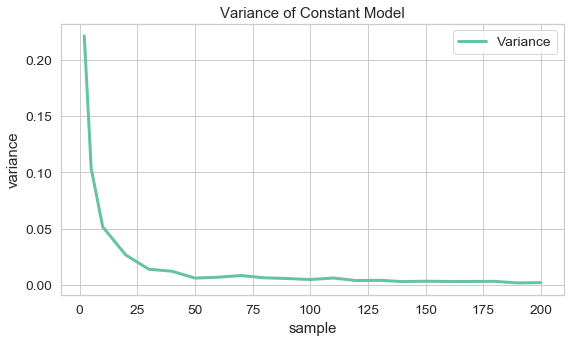

In [39]:
fig = plt.figure(figsize=(9, 5))
sns.lineplot(num_sample, variance, label='Variance')
plt.title('Variance of Constant Model')
plt.xlabel('sample')
plt.ylabel('variance')
plt.savefig('01-variance-const-sin.png', dpi=150)